In [1247]:
import pandas as pd

db = pd.read_csv('../Data/mobils.csv')
num_rows, num_columns = db.shape
print(f"Nombre de files: {num_rows}")
print(f"Nombre de columnes: {num_columns}")
print("Nombre de valors nuls per columna:")
print(db.isnull().sum())

Nombre de files: 1874
Nombre de columnes: 24
Nombre de valors nuls per columna:
URL                           3
Asin                         41
Precio                       82
Precio Inicial               82
Título                        1
Estrellas                   105
Opiniones                   106
Marca                       444
Modelo                      127
Año del modelo             1123
Dimensiones                 348
RAM                         746
Memoria                     263
Sistema operativo           916
Resolución pantalla         682
Tamaño pantalla            1678
Relación aspecto           1441
Peso                        143
Tecnología conectividad     538
Batería                    1855
Cámara principal           1800
Cámara frontal             1800
Procesador                 1349
Color                      1116
dtype: int64


In [1248]:
import numpy as np
db.loc[db['Opiniones'] < 10, 'Estrellas'] = np.nan

In [1251]:
columnas_moda = ["RAM", "Memoria", "Dimensiones"]

for columna in columnas_moda:
    moda = db[columna].mode()[0]
    db[columna] = db[columna].fillna(moda)
    print(f"La moda de {columna} és {moda}")

La moda de RAM és 128
La moda de Memoria és 128 GB
La moda de Dimensiones és 50 x 50 x 28


In [1252]:
db = db.dropna(subset=["Precio", "Precio Inicial"])

In [1253]:
columnas_mean = ["Estrellas", "Peso"]

for columna in columnas_mean:
    mean = db[columna].mean()
    db[columna] = db[columna].fillna(mean)
    print(f"La mean de {columna} és {mean}")

La mean de Estrellas és 4.132142857142857
La mean de Peso és 277.87590361445785


In [1254]:
db = db.drop(columns=[])

In [1255]:
db['Marca'].nunique()

176

In [1256]:
db['Marca'].unique()

array(['realme', 'xiaomi', 'samsung', nan, 'ulefone', 'aplimln',
       'apple computer', 'microsoft', 'apple', 'hotwav', 'sony', 'cubot',
       'msmga', 'generico', '8849', 'xgody', 'oukitel',
       'mcr infoelectronic,sl', 'ttfone', 'mcmgc', 'oscal', 'sewowibo',
       'vivo', 'nothing', 'annadue', 'mcr infoelectronic', 'doogee',
       'asus', 'sí', 'motorola', 'rainbuvvy', 'valmoni sport', 'honor',
       'umidigi', 'blackview', 'merch por amazon', 'tech data',
       'panasonic', 'mptech', 'osa', 'polarpro', 'wrtogo', 'zte', 'moft',
       'mlk03ql/a-cr', 'alcatel', 'oppo', 'hmd global oy', 'rvelon',
       'pthtechus', 'spc', 'nubia', 'toneof', 'high-tech place',
       'beghelli', 'unihertz', 'zunate', 'gamesir', 'vikye', 'gowenic',
       'jtqtj', 'zte corporation', 'hipipooo', 'qrzrq', 'maxcom',
       'vbestlife', 'mvvkky', 'fossibot', 'jetech', 'tcl', 'telefunken',
       'mq9x3zd/a', 'zokoe', 'shanwan', 'ati', 'adoc', 'mtgud',
       'sxhlseller', 'jcb phone', 'dorland', 

In [1257]:
db['Marca'].value_counts()

Marca
xiaomi     242
samsung    178
apple      137
doogee      84
oukitel     62
          ... 
iling        1
edglete      1
mizhao       1
ljcm         1
generic      1
Name: count, Length: 176, dtype: int64

In [1258]:
db['Marca'] = db['Marca'].where(db['Marca'].map(db['Marca'].value_counts()) > 1)

In [1259]:
import numpy as np

marcas_unicas = db['Marca'].dropna().unique()

db['Título'] = db['Título'].str.lower()

def buscar_marca(row):
    if pd.isna(row['Marca']):
        for marca in marcas_unicas:
            if isinstance(row['Título'], str) and marca in row['Título']:
                return marca
    return row['Marca']

db['Marca'] = db.apply(buscar_marca, axis=1)
db = db.dropna(subset=["Marca"])

In [1260]:
db['Modelo'].nunique()

1341

In [1261]:
db = db.drop(columns=['Modelo'])

In [1262]:
db = db.drop(columns=["URL", "Asin", "Título", "Opiniones", "Sistema operativo", "Resolución pantalla", "Tecnología conectividad", "Batería", "Color", "Procesador", "Cámara frontal", "Cámara principal", "Relación aspecto", "Tamaño pantalla", "Año del modelo"])

In [1263]:
db['Precio'] = db['Precio'].str.replace(r'\.', '', regex=True)  
db['Precio'] = db['Precio'].str.replace(',', '.', regex=True)
db['Precio'] = pd.to_numeric(db['Precio'], errors='coerce')
db = db[db['Precio'] >= 50]
db = db[db['Precio'] < 2000]

In [1264]:
num_rows, num_columns = db.shape
print(f"Nombre de files: {num_rows}")
print(f"Nombre de columnes: {num_columns}")
print("Nombre de valors nuls per columna:")
print(db.isnull().sum())

Nombre de files: 1605
Nombre de columnes: 8
Nombre de valors nuls per columna:
Precio            0
Precio Inicial    0
Estrellas         0
Marca             0
Dimensiones       0
RAM               0
Memoria           0
Peso              0
dtype: int64


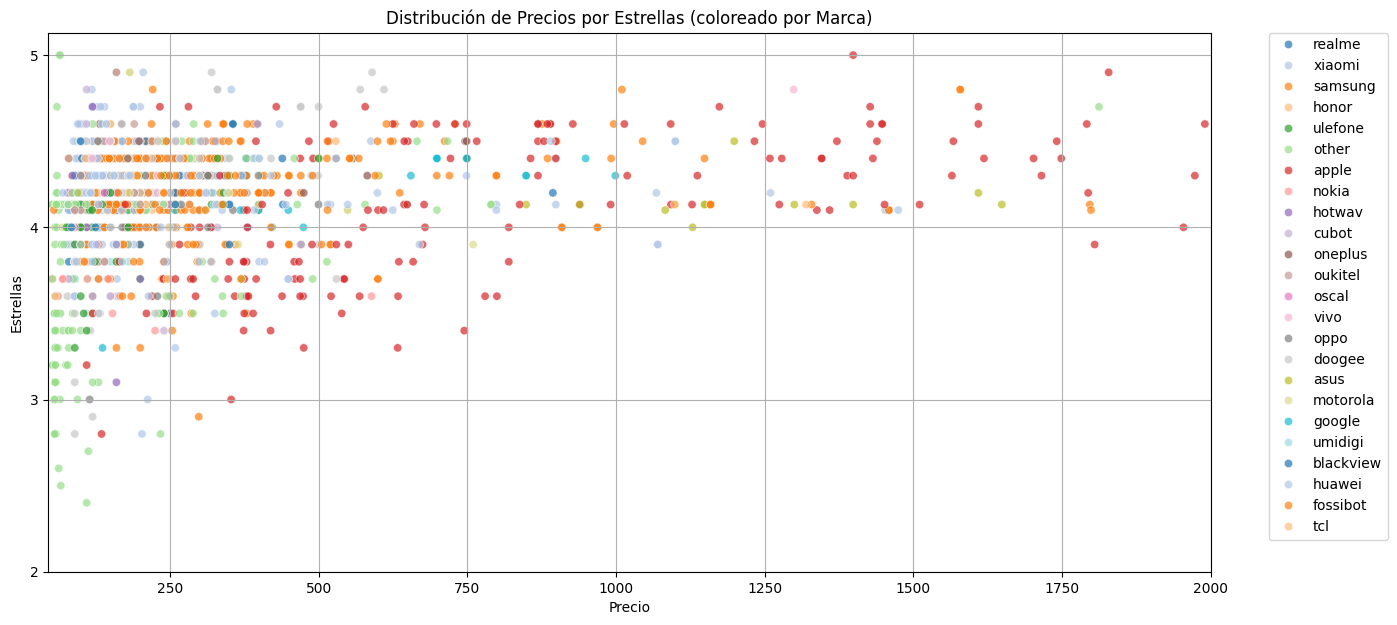

In [1265]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

marca_counts = db['Marca'].value_counts()
db['Marca_filtrada'] = db['Marca'].apply(lambda x: x if x in marca_counts[marca_counts > 10].index else 'other')

plt.figure(figsize=(15, 7))
sns.scatterplot(data=db, x='Precio', y='Estrellas', hue='Marca_filtrada', alpha=0.7, palette='tab20')
plt.xlabel('Precio')
plt.ylabel('Estrellas')
plt.title('Distribución de Precios por Estrellas (coloreado por Marca)')
plt.xlim(45, 2000)
plt.grid()
plt.yticks([2, 3, 4, 5])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

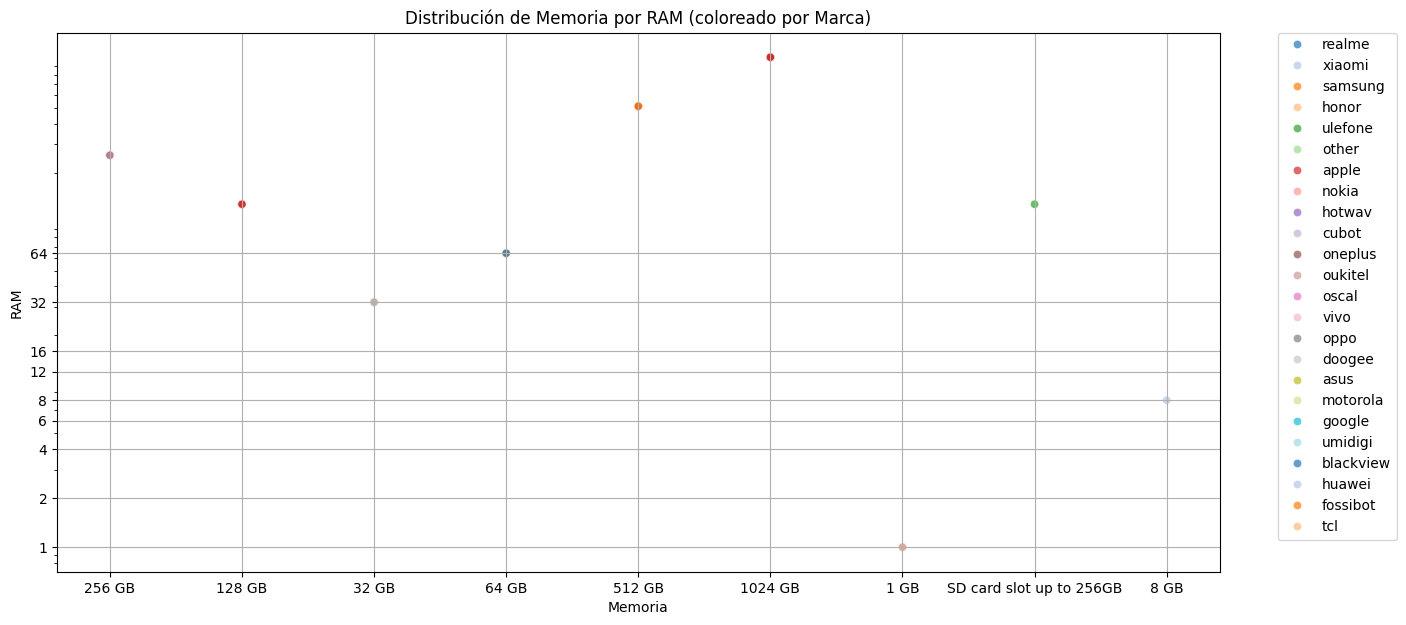

In [1266]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

marca_counts = db['Marca'].value_counts()
db['Marca_filtrada'] = db['Marca'].apply(lambda x: x if x in marca_counts[marca_counts > 10].index else 'other')

plt.figure(figsize=(15, 7))
sns.scatterplot(data=db, x='Memoria', y='RAM', hue='Marca_filtrada', alpha=0.7, palette='tab20')

plt.xlabel('Memoria')
plt.ylabel('RAM')
plt.title('Distribución de Memoria por RAM (coloreado por Marca)')
plt.yscale('log')
plt.yticks([1, 2, 4, 6, 8, 12, 16, 32, 64], labels=[1, 2, 4, 6, 8, 12, 16, 32, 64])
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()